<a id='intro'></a>
## Introduction<br>
> ### Dataset Information
Contains training and testing data for classifying a high resolution aerial image into 9 types of urban land cover. Multi-scale spectral, size, shape, and texture information are used for classification. There are a low number of training samples for each class (14-30) and a high number of classification variables (148), so it may be an interesting data set for testing feature selection methods. The testing data set is from a random sampling of the image. <br>
> Class is the target classification variable. The land cover classes are: trees, grass, soil, concrete, asphalt, buildings, cars, pools, shadows.
<br>
> ### Attributes Deatil
- Class    : Land cover class (nominal) 
- BrdIndx  : Border Index (shape variable) 
- Area     : Area in m2 (size variable) 
- Round    : Roundness (shape variable) 
- Bright   : Brightness (spectral variable) 
- Compact  : Compactness (shape variable) 
- ShpIndx  : Shape Index (shape variable) 
- Mean_G   : Green (spectral variable) 
- Mean_R   : Red (spectral variable) 
- Mean_NIR : Near Infrared (spectral variable) 
- SD_G     : Standard deviation of Green (texture variable) 
- SD_R     : Standard deviation of Red (texture variable) 
- SD_NIR   : Standard deviation of Near Infrared (texture variable) 
- LW       : Length/Width (shape variable) 
- GLCM1    : Gray-Level Co-occurrence Matrix (texture variable) 
- Rect     : Rectangularity (shape variable) 
- GLCM2    : Another Gray-Level Co-occurrence Matrix attribute (texture variable) 
- Dens     : Density (shape variable) 
- Assym    : Assymetry (shape variable) 
- NDVI     : Normalized Difference Vegetation Index (spectral variable) 
- BordLngth: Border Length (shape variable) 
- GLCM3    : Another Gray-Level Co-occurrence Matrix attribute (texture variable) 

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

In [3]:
train.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [4]:
test.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 194.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 586.3+ KB


Data Preproccessing

In [7]:
train.isnull().any().any()

False

In [8]:
sum(train.duplicated())

0

In [9]:
test.isnull().any().any()

False

In [10]:
sum(test.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

<a id='bsd'></a>
> ### Basic Statistical Details

In [11]:
import plotly.graph_objs as go
import plotly.offline as py

p = train.describe().T
p = p.round(4)
table = go.Table(
    columnwidth=[0.8]+[0.5]*8,
    header=dict(
        values=['Attribute'] + list(p.columns),
        line = dict(color='#506784'),
        fill = dict(color='lightblue'),
    ),
    cells=dict(
        values=[p.index] + [p[k].tolist() for k in p.columns[:]],
        line = dict(color='#506784'),
        fill = dict(color=['rgb(173, 216, 220)', '#f5f5fa'])
    )
)
py.iplot([table], filename='table-of-land-data')

In [12]:
print(train['class'].value_counts())

grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
asphalt      14
soil         14
Name: class, dtype: int64


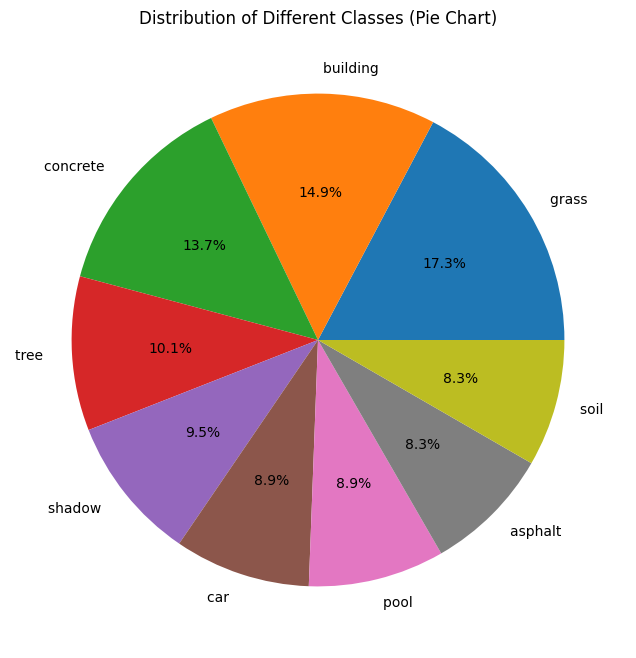

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

In [13]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20,8))
train['class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Different Classes (Pie Chart)')
plt.ylabel('')
plt.show()
plt.pie

c:\Users\tanus\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



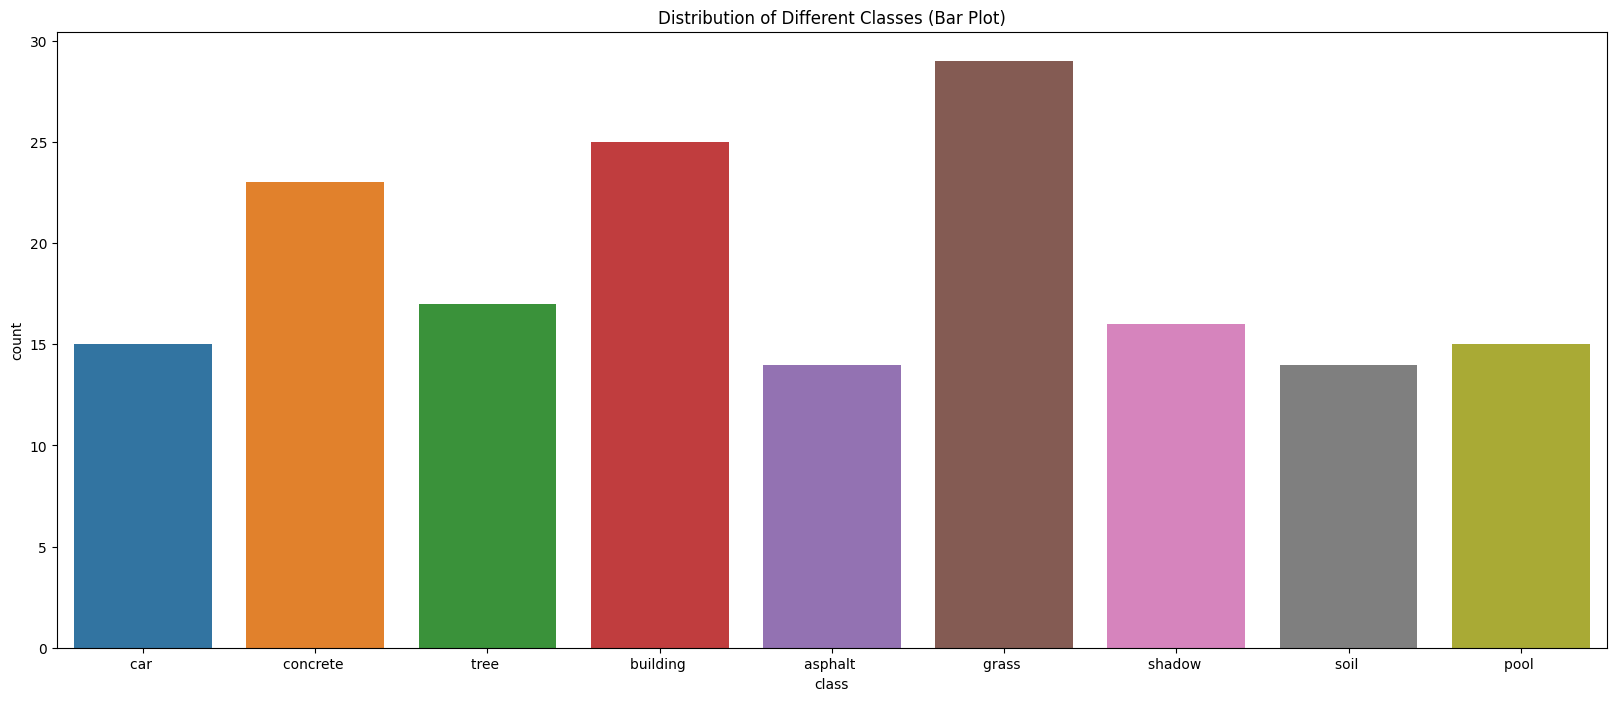

In [14]:
import seaborn as sns

f=plt.subplots(figsize=(20,8))
sns.countplot(train['class'])
plt.title('Distribution of Different Classes (Bar Plot)')
plt.show()

In [15]:
pd.DataFrame(train['class'])

,class
0,car
1,concrete
2,concrete
3,concrete
4,concrete
...,...
163,car
164,soil
165,grass
166,grass


In [16]:
print("Test data shape: ", test.shape)
print("Tain data shape: ", train.shape)

Test data shape:  (507, 148)
Tain data shape:  (168, 148)


In [17]:
from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = train.drop('class',axis=1).columns
Outliers_to_drop = detect_outliers(train,2,list_atributes)

In [18]:
train.loc[Outliers_to_drop]

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
11,asphalt,4.19,418,2.48,83.35,4.21,4.30,68.07,88.80,93.17,...,26.40,1.50,0.77,0.68,8.19,1.85,0.46,-0.11,1342,1294.14
10,building,1.57,3552,0.46,213.22,1.32,1.60,173.03,229.84,236.80,...,6.53,1.54,0.33,0.94,6.40,2.20,0.46,-0.14,410,3132.13
18,building,1.21,2797,0.78,244.70,1.34,1.23,229.52,252.21,252.37,...,6.84,1.27,0.52,0.85,6.72,2.18,0.44,-0.04,264,2605.29
32,building,1.48,3084,0.93,230.71,1.33,2.52,215.62,252.64,223.88,...,12.08,5.19,0.68,0.65,7.16,1.01,0.98,-0.07,682,1965.50
71,building,1.38,1482,0.54,145.95,1.42,1.42,122.53,156.16,159.16,...,8.45,1.20,0.54,0.87,6.70,2.20,0.41,-0.12,238,2345.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,grass,1.76,423,1.09,152.96,1.63,2.09,210.94,114.01,133.93,...,36.11,2.89,0.90,0.43,9.11,1.07,0.88,0.20,2022,680.93
134,asphalt,2.22,116,1.29,100.77,2.72,2.37,87.45,105.32,109.53,...,28.19,1.07,0.86,0.46,8.55,1.26,0.35,-0.02,1156,1087.71
13,grass,1.14,289,0.38,173.16,1.21,1.21,213.71,145.56,160.23,...,16.13,1.80,0.50,0.92,6.91,2.04,0.52,0.18,84,2915.26
158,asphalt,2.25,542,1.49,76.52,2.09,2.32,60.50,82.17,86.88,...,27.72,1.45,0.80,0.56,8.60,1.44,0.62,-0.09,3026,1297.05


In [19]:
train['class'].unique()

array(['car ', 'concrete ', 'tree ', 'building ', 'asphalt ', 'grass ',
       'shadow ', 'soil ', 'pool '], dtype=object)

In [20]:
group_map = {"grass ":0,"building ":1,'concrete ':2,'tree ':3,'shadow ':4,'pool ':5,'asphalt ':6,'soil ':7,'car ':8}

train['class'] = train['class'].map(group_map)
test['class'] = test['class'].map(group_map)
train['class'].unique()

array([8, 2, 3, 1, 6, 0, 4, 7, 5], dtype=int64)

c:\Users\tanus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\tanus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



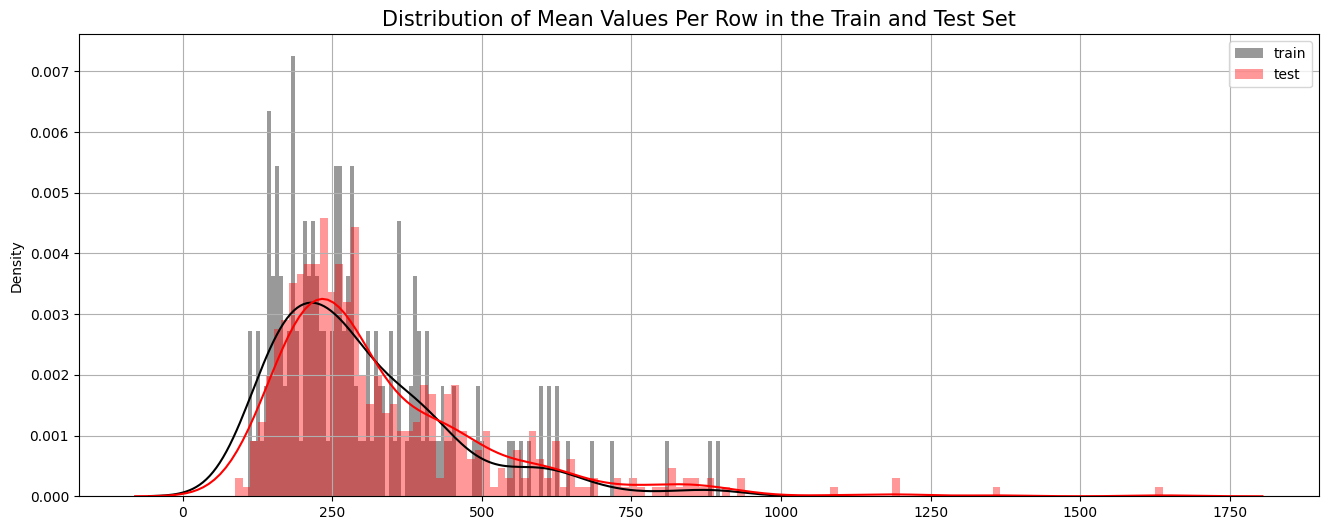

In [21]:
import seaborn as sns

plt.figure(figsize=(16,6))
features = train.columns.values[1:148]
plt.title("Distribution of Mean Values Per Row in the Train and Test Set",fontsize=15)
sns.distplot(train[features].mean(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.grid()
plt.show()

c:\Users\tanus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\tanus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



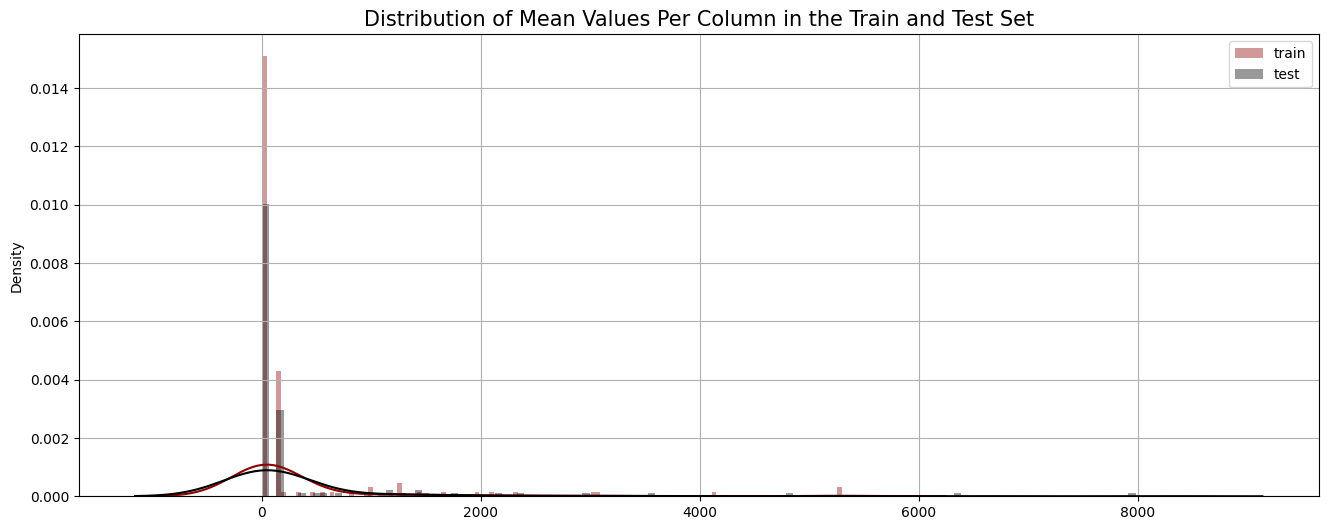

In [22]:
plt.figure(figsize=(16,6))
plt.title("Distribution of Mean Values Per Column in the Train and Test Set",fontsize=15)
sns.distplot(train[features].mean(axis=0),color="darkred",kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=0),color="black", kde=True,bins=120, label='test')
plt.legend()
plt.grid()
plt.show()

## Features Correlation

c:\Users\tanus\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



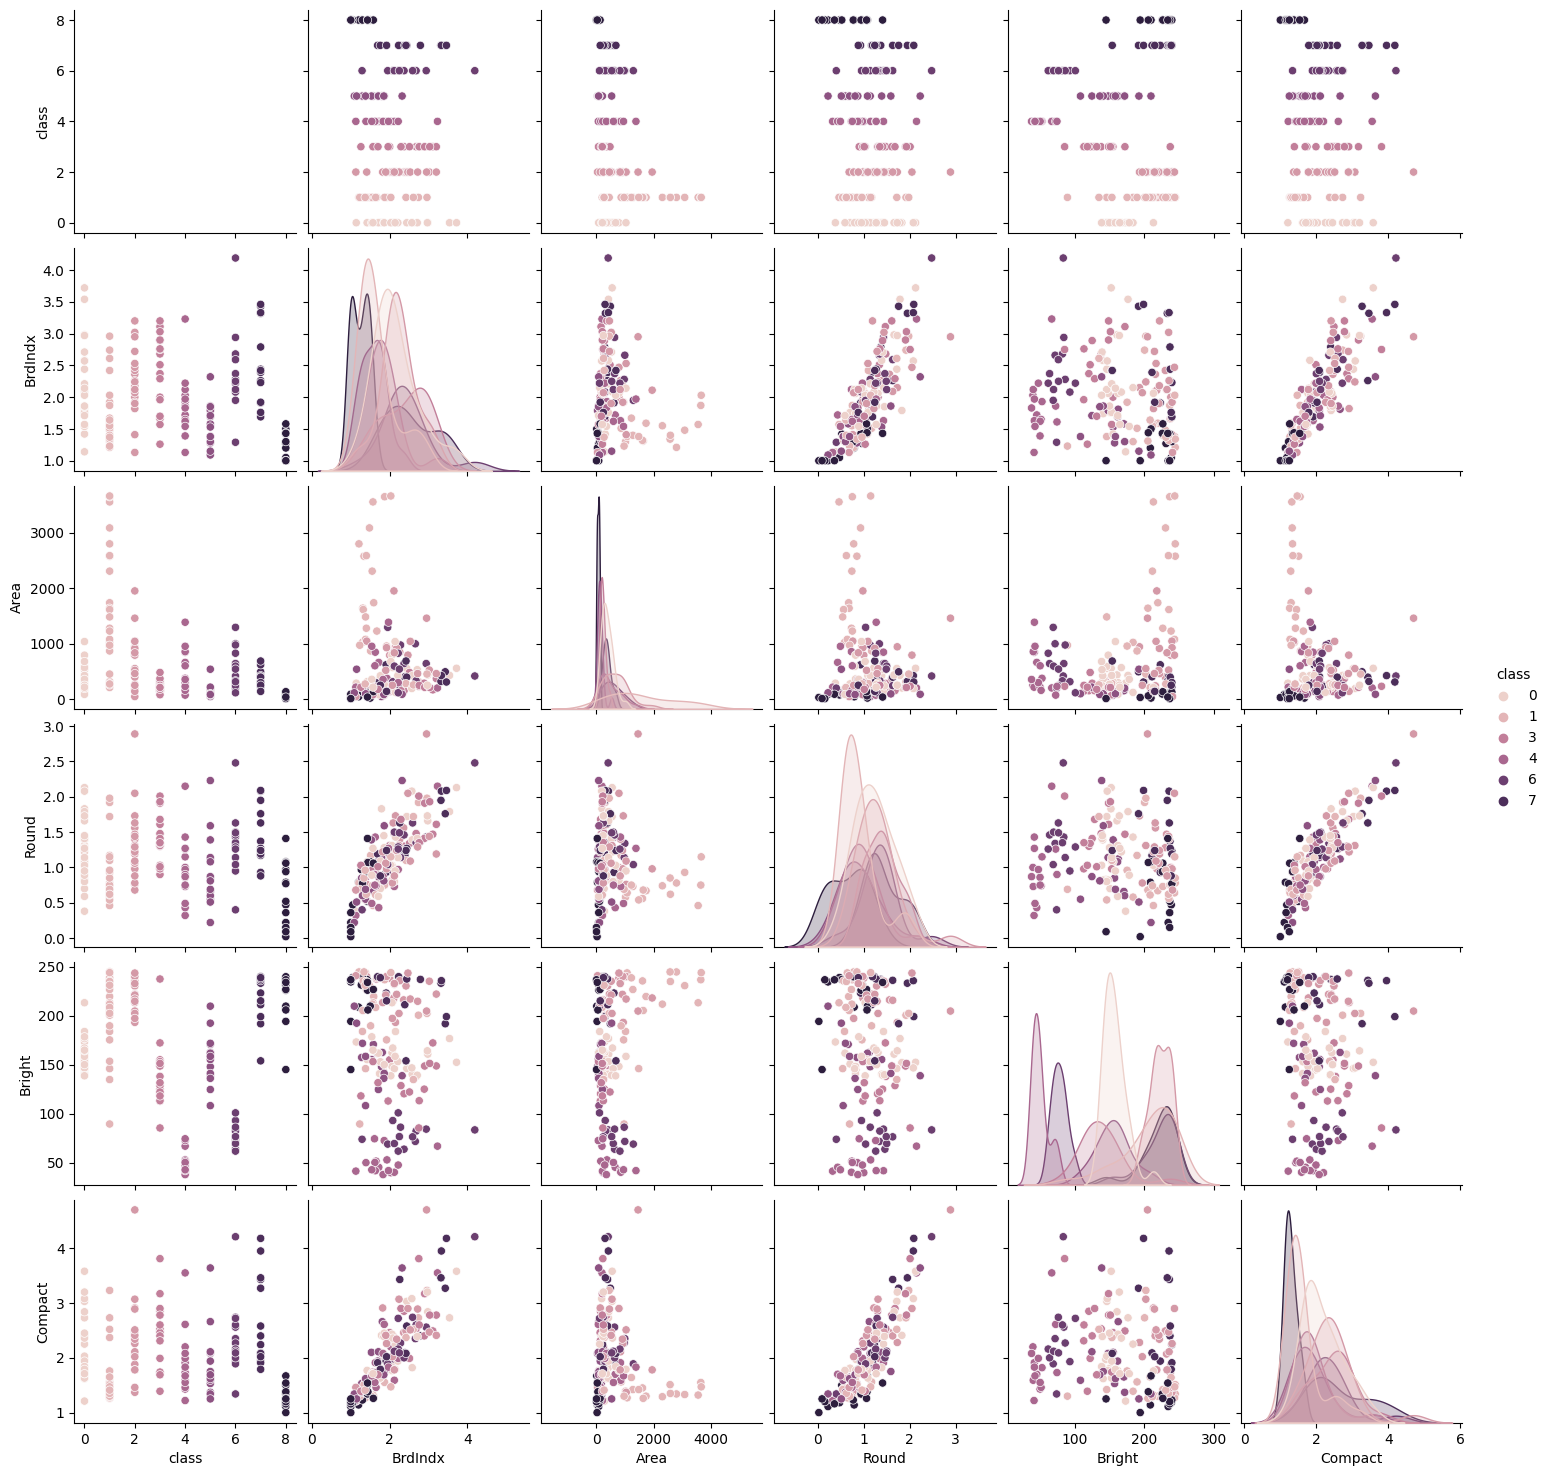

In [23]:
sns.pairplot(train, vars=['class', 'BrdIndx','Area','Round','Bright','Compact'], hue='class')
plt.show()

In [24]:
correlations = train.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head()

,level_0,level_1,0
0,SD_R,GLCM1_60,0.000052
1,GLCM1_60,SD_R,0.000052
2,Mean_NIR,BordLngth,0.000162
3,BordLngth,Mean_NIR,0.000162
4,Mean_R_40,Round_40,0.000190


In [25]:
train.corr()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
class,1.000000,-0.101181,-0.333139,-0.090156,-0.045079,-0.055344,-0.142449,-0.245946,0.044366,0.059752,...,0.472650,-0.081657,0.016086,-0.155190,0.183234,-0.107280,0.115273,-0.306071,0.033096,0.112343
BrdIndx,-0.101181,1.000000,-0.085323,0.812346,-0.130840,0.850907,0.927880,0.031682,-0.184280,-0.193597,...,-0.277076,-0.003958,0.132450,-0.053175,0.054574,-0.052002,0.082947,0.189878,0.325416,-0.172826
Area,-0.333139,-0.085323,1.000000,-0.136122,0.209606,-0.196019,-0.060541,0.122032,0.257676,0.188346,...,-0.477784,-0.024002,-0.515630,0.184573,-0.488814,0.147517,-0.022321,-0.203883,-0.003688,0.294540
Round,-0.090156,0.812346,-0.136122,1.000000,-0.080434,0.875559,0.807917,0.037312,-0.134604,-0.113289,...,-0.118309,0.072366,0.141305,-0.120943,0.106250,-0.121878,0.127552,0.115410,0.268510,-0.129261
Bright,-0.045079,-0.130840,0.209606,-0.080434,1.000000,-0.107238,-0.126049,0.828018,0.966238,0.945227,...,-0.097671,0.087739,-0.385719,-0.035419,-0.348356,-0.095171,0.123616,-0.304292,0.030459,0.341320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dens_140,-0.107280,-0.052002,0.147517,-0.121878,-0.095171,-0.071024,-0.217712,-0.106720,-0.106123,-0.049063,...,-0.008315,-0.544583,-0.066119,0.687181,-0.200455,1.000000,-0.722863,-0.000938,-0.598767,0.016892
Assym_140,0.115273,0.082947,-0.022321,0.127552,0.123616,0.046128,0.213635,0.067523,0.148202,0.119163,...,-0.002989,0.405040,-0.066632,-0.241053,-0.001585,-0.722863,1.000000,-0.155393,0.319782,0.067005
NDVI_140,-0.306071,0.189878,-0.203883,0.115410,-0.304292,0.109052,0.175166,0.225747,-0.497364,-0.519899,...,-0.115221,-0.052618,0.395614,-0.160844,0.416989,-0.000938,-0.155393,1.000000,0.020084,-0.385285
BordLngth_140,0.033096,0.325416,-0.003688,0.268510,0.030459,0.242356,0.415962,0.066039,0.038614,-0.018910,...,-0.232497,0.467051,0.093954,-0.504022,0.157840,-0.598767,0.319782,0.020084,1.000000,-0.129700


In [26]:
test.corr()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
class,1.000000,-0.084764,-0.238117,-0.042824,-0.307177,-0.024153,-0.081759,-0.439627,-0.227165,-0.223079,...,0.296098,-0.047791,0.101233,-0.086060,0.230047,-0.091116,0.076398,-0.119897,-0.037182,-0.025007
BrdIndx,-0.084764,1.000000,-0.086700,0.816766,-0.109369,0.809829,0.936453,-0.026254,-0.130491,-0.137826,...,-0.073419,-0.052523,0.050922,-0.096810,0.004468,-0.073304,0.047360,0.088526,0.119537,-0.083757
Area,-0.238117,-0.086700,1.000000,-0.187530,0.318370,-0.206081,-0.076327,0.136209,0.376811,0.353616,...,-0.531411,0.034751,-0.606746,0.286836,-0.590834,0.136288,0.042868,-0.395051,-0.056874,0.491452
Round,-0.042824,0.816766,-0.187530,1.000000,-0.186799,0.873255,0.809926,-0.077275,-0.216884,-0.214164,...,0.089149,-0.066718,0.160827,-0.139619,0.148829,-0.078569,0.023294,0.159653,0.046809,-0.162999
Bright,-0.307177,-0.109369,0.318370,-0.186799,1.000000,-0.168168,-0.094181,0.850414,0.971974,0.974658,...,-0.305885,0.019821,-0.367331,0.073476,-0.399137,0.077810,-0.059308,-0.401564,0.089090,0.320703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dens_140,-0.091116,-0.073304,0.136288,-0.078569,0.077810,-0.109534,-0.193049,0.052035,0.080511,0.082702,...,-0.137128,-0.433777,-0.097508,0.698259,-0.247190,1.000000,-0.708845,-0.020341,-0.615620,0.054980
Assym_140,0.076398,0.047360,0.042868,0.023294,-0.059308,0.044727,0.146839,-0.091267,-0.042609,-0.038968,...,-0.006584,0.368995,-0.076614,-0.184308,-0.003216,-0.708845,1.000000,-0.065706,0.310053,0.083965
NDVI_140,-0.119897,0.088526,-0.395051,0.159653,-0.401564,0.170852,0.071638,0.052972,-0.566212,-0.541152,...,0.354232,-0.089675,0.566575,-0.187405,0.571453,-0.020341,-0.065706,1.000000,-0.050472,-0.551437
BordLngth_140,-0.037182,0.119537,-0.056874,0.046809,0.089090,0.062145,0.148900,0.099780,0.080191,0.073178,...,-0.062300,0.326442,0.043015,-0.550028,0.090675,-0.615620,0.310053,-0.050472,1.000000,-0.069613


Model Building

In [27]:
X_train = train.drop(['class'], axis=1)
y_train = pd.DataFrame(train['class'].values)
X_test = test.drop(['class'], axis=1)
y_test = pd.DataFrame(test['class'].values)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
prediction_dtc = dtc.predict(X_test)
print("Validation Score for DecisionTreeClassifier: ", accuracy_score(y_test,prediction_dtc))

Validation Score for DecisionTreeClassifier:  0.7021696252465484


In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
prediction_xgb = xgb.predict(X_test)
print("Validation Score for XGBClassifier: ", accuracy_score(y_test,prediction_xgb))

Validation Score for XGBClassifier:  0.7909270216962525


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc =  RandomForestClassifier()
rfc.fit(X_train, y_train)
prediction_rfc = rfc.predict(X_test)

print("Validation Score RandomForestClassifier: ", accuracy_score(y_test,prediction_rfc))

Validation Score RandomForestClassifier:  0.8106508875739645


C:\Users\tanus\AppData\Local\Temp\ipykernel_10068\1379214401.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [31]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=12)
knc.fit(X_train, y_train)
predict_knc = knc.predict(np.array(X_test))
print("Validation Score: ", accuracy_score(y_test,predict_knc))

Validation Score:  0.3905325443786982


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [32]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train,y_train)

pred_svm = sv.predict(X_test)
print(sv.score(X_test,y_test))

print(accuracy_score(y_test,pred_svm))
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,pred_svm)
cf

0.5660749506903353
0.5660749506903353


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([[60,  4,  2,  9,  3,  0,  0,  5,  0],
       [10, 61, 14,  1,  0,  3,  1,  7,  0],
       [ 9,  8, 47,  1,  0,  1,  0, 26,  1],
       [37,  0,  0, 38, 13,  0,  0,  1,  0],
       [ 0,  1,  0, 11, 23,  2,  8,  0,  0],
       [ 0,  1,  0,  2,  0, 11,  0,  0,  0],
       [ 3,  0,  0,  3, 12,  0, 26,  1,  0],
       [ 7,  2,  1,  1,  0,  1,  0,  8,  0],
       [ 1,  1,  1,  1,  0,  0,  0,  4, 13]], dtype=int64)

In [33]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier()
rc.fit(X_train,y_train)
pred_rc = rc.predict(X_test)
accuracy_score(y_test,pred_rc)

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.6094674556213018

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [60, 70, 100],
    'max_depth': [5,6,7],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Classifier object
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=7, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
Best score: 0.8571428571428573


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Last 21 features without dropping outliers

In [35]:
X1_train = train.iloc[:,127:]
y1_train = train.iloc[:,:1]
X1_test = test.iloc[:,127:]
y1_test = test.iloc[:,:1]

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(X1_train, y1_train)
prediction_dtc = dtc.predict(X1_test)
print("Validation Score for DecisionTreeClassifier: ", accuracy_score(y1_test,prediction_dtc))

Validation Score for DecisionTreeClassifier:  0.591715976331361


In [37]:
xgb = XGBClassifier()
xgb.fit(X1_train, y1_train)
prediction_xgb = xgb.predict(X1_test)
print("Validation Score for XGBClassifier: ", accuracy_score(y1_test,prediction_xgb))

Validation Score for XGBClassifier:  0.611439842209073


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc =  RandomForestClassifier(random_state=42)
rfc.fit(X1_train, y1_train)
prediction_rfc = rfc.predict(X1_test)
print("Validation Score RandomForestClassifier: ", accuracy_score(y1_test,prediction_rfc))

Validation Score RandomForestClassifier:  0.6745562130177515


C:\Users\tanus\AppData\Local\Temp\ipykernel_10068\1154191659.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [39]:
knc = KNeighborsClassifier(n_neighbors=12)
knc.fit(X1_train, y1_train)
predict_knc = knc.predict(np.array(X1_test))
print("Validation Score: ", accuracy_score(y1_test,predict_knc))

Validation Score:  0.29980276134122286


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [40]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X1_train,y1_train)

pred_svm = sv.predict(X1_test)
print(sv.score(X1_test,y1_test))

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.611439842209073


In [41]:
rc = RidgeClassifier()
rc.fit(X1_train,y1_train)
pred_rc = rc.predict(X1_test)
accuracy_score(y1_test,pred_rc)

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.6291913214990138

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [20,30,50],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Classifier object
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=6, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X1_train, y1_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
Best score: 0.7738095238095238


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Classifier Models after dropping Outliers

In [43]:
train1 = train.drop(Outliers_to_drop)

In [44]:
X_train1 = train1.drop(['class'], axis=1)
y_train1 = pd.DataFrame(train1['class'].values)
X_test1 = test.drop(['class'], axis=1)
y_test1 = pd.DataFrame(test['class'].values)

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train1, y_train1)
prediction_dtc = dtc.predict(X_test1)
print("Validation Score for DecisionTreeClassifier: ", accuracy_score(y_test1,prediction_dtc))

Validation Score for DecisionTreeClassifier:  0.7297830374753451


In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train1, y_train1)
prediction_xgb = xgb.predict(X_test1)
print("Validation Score for XGBClassifier: ", accuracy_score(y_test1,prediction_xgb))

Validation Score for XGBClassifier:  0.73767258382643


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc =  RandomForestClassifier()
rfc.fit(X_train1, y_train1)
prediction_rfc = rfc.predict(X_test1)
print("Validation Score RandomForestClassifier: ", accuracy_score(y_test1,prediction_rfc))

C:\Users\tanus\AppData\Local\Temp\ipykernel_10068\3031258219.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Validation Score RandomForestClassifier:  0.7652859960552268


In [48]:
knc = KNeighborsClassifier(n_neighbors=12)
knc.fit(X_train1, y_train1)
predict_knc = knc.predict(np.array(X_test1))
print("Validation Score: ", accuracy_score(y_test1,predict_knc))

Validation Score:  0.2958579881656805


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [49]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train1,y_train1)

pred_svm = sv.predict(X_test1)
print(sv.score(X_test1,y_test1))

0.48717948717948717


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [50]:
rc = RidgeClassifier()
rc.fit(X_train1,y_train1)
pred_rc = rc.predict(X_test1)
accuracy_score(y_test1,pred_rc)

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.48717948717948717

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [20,30,50],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Classifier object
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=7, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train1, y_train1)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=7.



Best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Best score: 0.9142857142857144


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Last 21 features after dropping outliers

In [52]:
X1_train1 = train1.iloc[:,127:]
y1_train1 = train1.iloc[:,:1]
X1_test1 = test.iloc[:,127:]
y1_test1 = test.iloc[:,:1]

In [53]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X1_train1, y1_train1)
prediction_dtc = dtc.predict(X1_test1)
print("Validation Score for DecisionTreeClassifier: ", accuracy_score(y1_test1,prediction_dtc))

Validation Score for DecisionTreeClassifier:  0.5759368836291914


In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X1_train1, y1_train1)
prediction_xgb = xgb.predict(X1_test1)
print("Validation Score for XGBClassifier: ", accuracy_score(y1_test1,prediction_xgb))

Validation Score for XGBClassifier:  0.5976331360946746


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc =  RandomForestClassifier(random_state=42)
rfc.fit(X1_train1, y1_train1)
prediction_rfc = rfc.predict(X1_test1)
print("Validation Score RandomForestClassifier: ", accuracy_score(y_test1,prediction_rfc))

Validation Score RandomForestClassifier:  0.6449704142011834


C:\Users\tanus\AppData\Local\Temp\ipykernel_10068\2477419139.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [56]:
knc = KNeighborsClassifier(n_neighbors=12)
knc.fit(X1_train1, y1_train1)
predict_knc = knc.predict(np.array(X1_test1))
print("Validation Score: ", accuracy_score(y1_test1,predict_knc))

Validation Score:  0.25443786982248523


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [57]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X1_train1,y1_train1)

pred_svm = sv.predict(X1_test1)
print(sv.score(X1_test1,y1_test1))

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.52465483234714


In [58]:
rc = RidgeClassifier()
rc.fit(X1_train1,y1_train1)
pred_rc = rc.predict(X1_test1)
accuracy_score(y1_test1,pred_rc)

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.5226824457593688

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [20,30,50],
    'max_depth': [2,3,5],
    'min_samples_split': [2,4,5],
    'min_samples_leaf': [1,2],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Classifier object
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=7, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X1_train1, y1_train1)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=7.



Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.8380952380952381


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Using Avg Values 

In [60]:
d1 = pd.read_csv('training_avg.csv')
d2 = pd.read_csv('testing_avg.csv')

In [61]:
d1

,class,avg_BrdIndx,avg_Area,avg_Round,avg_Bright,avg_Compact,avg_ShpIndx,avg_Mean_G,avg_Mean_R,avg_Mean_NIR,...,avg_SD_NIR,avg_LW,avg_GLCM1,avg_Rect,avg_GLCM2,avg_Dens,avg_Assym,avg_NDVI,avg_BordLngth,avg_GLCM3
0,car,1.321429,96.142857,1.098571,227.788571,1.330000,1.427143,204.517143,237.874286,240.965714,...,25.110000,2.027143,0.497143,0.852857,6.281429,1.660000,0.705714,-0.080000,56.000000,3865.407143
1,concrete,4.057143,4542.857143,1.735714,209.681429,2.835714,4.418571,182.967143,222.067143,224.015714,...,17.244286,2.164286,0.691429,0.548571,7.810000,1.395714,0.735714,-0.097143,1193.714286,2079.558571
2,concrete,2.047143,3416.428571,1.288571,226.061429,1.938571,2.205714,203.590000,236.590000,238.005714,...,12.158571,2.040000,0.684286,0.737143,6.962857,1.678571,0.724286,-0.072857,478.857143,1686.251429
3,concrete,2.951429,6492.857143,1.748571,230.104286,2.662857,3.414286,203.794286,243.357143,243.154286,...,10.110000,2.925714,0.685714,0.675714,7.058571,1.340000,0.877143,-0.090000,1052.857143,1897.784286
4,concrete,2.588571,7999.714286,2.052857,195.424286,3.274286,7.057143,174.115714,205.271429,206.887143,...,14.318571,26.630000,0.810000,0.575714,7.837143,0.465714,0.997143,-0.082857,2755.142857,1445.695714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,car,1.294286,124.142857,0.840000,188.997143,1.408571,1.418571,163.441429,199.042857,204.508571,...,45.061429,1.740000,0.574286,0.791429,6.668571,1.781429,0.454286,-0.097143,60.285714,3343.344286
164,soil,2.617143,2248.857143,1.485714,198.931429,2.412857,2.942857,203.741429,196.155714,196.898571,...,14.304286,2.355714,0.691429,0.674286,7.204286,1.552857,0.730000,0.018571,544.285714,2028.372857
165,grass,2.641429,3169.571429,1.547143,169.300000,2.438571,2.798571,187.770000,157.770000,162.355714,...,22.701429,1.802857,0.782857,0.710000,7.832857,1.760000,0.554286,0.085714,592.285714,1390.728571
166,grass,1.767143,918.857143,1.441429,178.602857,1.658571,1.858571,203.118571,164.431429,168.260000,...,19.747143,1.520000,0.755714,0.778571,7.492857,1.851429,0.471429,0.104286,216.571429,1645.632857


In [62]:
group_map = {"grass ":0,"building ":1,'concrete ':2,'tree ':3,'shadow ':4,'pool ':5,'asphalt ':6,'soil ':7,'car ':8}

d1['class'] = d1['class'].map(group_map)
d1['class'].unique()

array([8, 2, 3, 1, 6, 0, 4, 7, 5], dtype=int64)

In [63]:
d1

,class,avg_BrdIndx,avg_Area,avg_Round,avg_Bright,avg_Compact,avg_ShpIndx,avg_Mean_G,avg_Mean_R,avg_Mean_NIR,...,avg_SD_NIR,avg_LW,avg_GLCM1,avg_Rect,avg_GLCM2,avg_Dens,avg_Assym,avg_NDVI,avg_BordLngth,avg_GLCM3
0,8,1.321429,96.142857,1.098571,227.788571,1.330000,1.427143,204.517143,237.874286,240.965714,...,25.110000,2.027143,0.497143,0.852857,6.281429,1.660000,0.705714,-0.080000,56.000000,3865.407143
1,2,4.057143,4542.857143,1.735714,209.681429,2.835714,4.418571,182.967143,222.067143,224.015714,...,17.244286,2.164286,0.691429,0.548571,7.810000,1.395714,0.735714,-0.097143,1193.714286,2079.558571
2,2,2.047143,3416.428571,1.288571,226.061429,1.938571,2.205714,203.590000,236.590000,238.005714,...,12.158571,2.040000,0.684286,0.737143,6.962857,1.678571,0.724286,-0.072857,478.857143,1686.251429
3,2,2.951429,6492.857143,1.748571,230.104286,2.662857,3.414286,203.794286,243.357143,243.154286,...,10.110000,2.925714,0.685714,0.675714,7.058571,1.340000,0.877143,-0.090000,1052.857143,1897.784286
4,2,2.588571,7999.714286,2.052857,195.424286,3.274286,7.057143,174.115714,205.271429,206.887143,...,14.318571,26.630000,0.810000,0.575714,7.837143,0.465714,0.997143,-0.082857,2755.142857,1445.695714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,8,1.294286,124.142857,0.840000,188.997143,1.408571,1.418571,163.441429,199.042857,204.508571,...,45.061429,1.740000,0.574286,0.791429,6.668571,1.781429,0.454286,-0.097143,60.285714,3343.344286
164,7,2.617143,2248.857143,1.485714,198.931429,2.412857,2.942857,203.741429,196.155714,196.898571,...,14.304286,2.355714,0.691429,0.674286,7.204286,1.552857,0.730000,0.018571,544.285714,2028.372857
165,0,2.641429,3169.571429,1.547143,169.300000,2.438571,2.798571,187.770000,157.770000,162.355714,...,22.701429,1.802857,0.782857,0.710000,7.832857,1.760000,0.554286,0.085714,592.285714,1390.728571
166,0,1.767143,918.857143,1.441429,178.602857,1.658571,1.858571,203.118571,164.431429,168.260000,...,19.747143,1.520000,0.755714,0.778571,7.492857,1.851429,0.471429,0.104286,216.571429,1645.632857


In [64]:
d2

,class,avg_BrdIndx,avg_Area,avg_Round,avg_Bright,avg_Compact,avg_ShpIndx,avg_Mean_G,avg_Mean_R,avg_Mean_NIR,...,avg_SD_NIR,avg_LW,avg_GLCM1,avg_Rect,avg_GLCM2,avg_Dens,avg_Assym,avg_NDVI,avg_BordLngth,avg_GLCM3
0,concrete,2.401429,2935.428571,1.777143,197.035714,3.301429,2.935714,170.008571,208.761429,212.334286,...,26.051429,4.421429,0.660000,0.598571,7.775714,1.071429,0.750000,-0.102857,596.571429,2440.354286
1,shadow,1.145714,1300.285714,0.528571,49.397143,1.121429,1.400000,38.501429,50.747143,58.951429,...,11.280000,3.607143,0.505714,0.944286,6.965714,1.704286,0.841429,-0.140000,199.428571,2813.337143
2,shadow,2.274286,2709.142857,1.800000,48.695714,2.440000,2.694286,42.894286,47.912857,55.281429,...,12.550000,3.127143,0.641429,0.661429,7.158571,1.330000,0.875714,-0.058571,578.285714,1827.481429
3,tree,2.528571,1111.428571,1.931429,78.587143,2.861429,3.508571,100.467143,63.938571,71.352857,...,25.748571,5.424286,0.845714,0.590000,8.377143,1.000000,0.945714,0.221429,447.714286,1260.087143
4,asphalt,3.214286,1517.428571,1.560000,100.290000,2.731429,3.360000,85.491429,105.017143,110.352857,...,23.714286,1.392857,0.731429,0.654286,7.940000,1.722857,0.320000,-0.105714,471.428571,2002.381429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,building,1.668571,6929.142857,1.260000,244.518571,1.471429,1.707143,229.894286,251.612857,252.051429,...,5.410000,1.358571,0.577143,0.831429,6.722857,2.071429,0.438571,-0.044286,575.428571,2118.224286
503,grass,3.261429,3050.428571,1.958571,159.467143,3.175714,3.312857,204.284286,129.241429,144.870000,...,12.174286,1.162857,0.794286,0.672857,7.302857,1.795714,0.408571,0.224286,724.571429,1352.977143
504,concrete,3.194286,7518.571429,1.634286,220.951429,2.111429,3.315714,193.752857,233.642857,235.460000,...,11.417143,1.507143,0.638571,0.811429,7.178571,1.985714,0.371429,-0.092857,1153.142857,2010.222857
505,building,2.432857,2866.714286,1.448571,209.461429,1.785714,3.015714,176.837143,223.672857,227.878571,...,26.405714,3.984286,0.665714,0.750000,7.858571,1.350000,0.838571,-0.120000,565.142857,2295.698571


In [65]:
group_map = {"grass ":0,"building ":1,'concrete ':2,'tree ':3,'shadow ':4,'pool ':5,'asphalt ':6,'soil ':7,'car ':8}

d2['class'] = d2['class'].map(group_map)
d2['class'].unique()

array([2, 4, 3, 6, 1, 0, 5, 8, 7], dtype=int64)

In [66]:
d2

,class,avg_BrdIndx,avg_Area,avg_Round,avg_Bright,avg_Compact,avg_ShpIndx,avg_Mean_G,avg_Mean_R,avg_Mean_NIR,...,avg_SD_NIR,avg_LW,avg_GLCM1,avg_Rect,avg_GLCM2,avg_Dens,avg_Assym,avg_NDVI,avg_BordLngth,avg_GLCM3
0,2,2.401429,2935.428571,1.777143,197.035714,3.301429,2.935714,170.008571,208.761429,212.334286,...,26.051429,4.421429,0.660000,0.598571,7.775714,1.071429,0.750000,-0.102857,596.571429,2440.354286
1,4,1.145714,1300.285714,0.528571,49.397143,1.121429,1.400000,38.501429,50.747143,58.951429,...,11.280000,3.607143,0.505714,0.944286,6.965714,1.704286,0.841429,-0.140000,199.428571,2813.337143
2,4,2.274286,2709.142857,1.800000,48.695714,2.440000,2.694286,42.894286,47.912857,55.281429,...,12.550000,3.127143,0.641429,0.661429,7.158571,1.330000,0.875714,-0.058571,578.285714,1827.481429
3,3,2.528571,1111.428571,1.931429,78.587143,2.861429,3.508571,100.467143,63.938571,71.352857,...,25.748571,5.424286,0.845714,0.590000,8.377143,1.000000,0.945714,0.221429,447.714286,1260.087143
4,6,3.214286,1517.428571,1.560000,100.290000,2.731429,3.360000,85.491429,105.017143,110.352857,...,23.714286,1.392857,0.731429,0.654286,7.940000,1.722857,0.320000,-0.105714,471.428571,2002.381429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1,1.668571,6929.142857,1.260000,244.518571,1.471429,1.707143,229.894286,251.612857,252.051429,...,5.410000,1.358571,0.577143,0.831429,6.722857,2.071429,0.438571,-0.044286,575.428571,2118.224286
503,0,3.261429,3050.428571,1.958571,159.467143,3.175714,3.312857,204.284286,129.241429,144.870000,...,12.174286,1.162857,0.794286,0.672857,7.302857,1.795714,0.408571,0.224286,724.571429,1352.977143
504,2,3.194286,7518.571429,1.634286,220.951429,2.111429,3.315714,193.752857,233.642857,235.460000,...,11.417143,1.507143,0.638571,0.811429,7.178571,1.985714,0.371429,-0.092857,1153.142857,2010.222857
505,1,2.432857,2866.714286,1.448571,209.461429,1.785714,3.015714,176.837143,223.672857,227.878571,...,26.405714,3.984286,0.665714,0.750000,7.858571,1.350000,0.838571,-0.120000,565.142857,2295.698571


In [67]:
d1.drop(Outliers_to_drop,inplace=True)

In [68]:
x2_train = d1.iloc[:,1:]
y2_train = d1.iloc[:,:1]

x2_test = d2.iloc[:,1:]
y2_test = d2.iloc[:,:1]

In [69]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x2_train, y2_train)
prediction_dtc = dtc.predict(x2_test)
print("Validation Score for DecisionTreeClassifier: ", accuracy_score(y2_test,prediction_dtc))

Validation Score for DecisionTreeClassifier:  0.7140039447731755


In [70]:
xgb = XGBClassifier()
xgb.fit(x2_train, y2_train)
prediction_xgb = xgb.predict(x2_test)
print("Validation Score for XGBClassifier: ", accuracy_score(y2_test,prediction_xgb))

Validation Score for XGBClassifier:  0.7041420118343196


In [71]:
rfc =  RandomForestClassifier(random_state=42)
rfc.fit(x2_train, y2_train)
prediction_rfc = rfc.predict(x2_test)
print("Validation Score RandomForestClassifier: ", accuracy_score(y2_test,prediction_rfc))

Validation Score RandomForestClassifier:  0.73767258382643


C:\Users\tanus\AppData\Local\Temp\ipykernel_10068\1681612273.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [72]:
knc = KNeighborsClassifier(n_neighbors=12)
knc.fit(x2_train, y2_train)
predict_knc = knc.predict(np.array(x2_test))
print("Validation Score: ", accuracy_score(y2_test,predict_knc))

Validation Score:  0.3214990138067061


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [73]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(x2_train,y2_train)

print(sv.score(x2_test,y2_test))

0.6863905325443787


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [74]:
rc = RidgeClassifier()
rc.fit(x2_train,y2_train)
pred_rc = rc.predict(x2_test)
accuracy_score(y2_test,pred_rc)

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.6587771203155819

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [20,30,50],
     'max_depth': [2,5,7],
     'min_samples_split': [2,4,5],
     'min_samples_leaf': [1,2],
     'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Classifier object:
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=9, n_jobs=-1) #cv=9

# Fit the GridSearchCV object to the data
grid_search.fit(x2_train, y2_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=9.



Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}
Best score: 0.8560606060606061


c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Streamlit

In [76]:
gs_cv = GridSearchCV(rf, param_grid={'max_depth': [7], 'max_features': ['sqrt'], 'min_samples_leaf': [1], 'min_samples_split': [4], 'n_estimators': [50]}, cv=9, n_jobs=-1)
gs_cv.fit(x2_train, y2_train)
gs_cv.best_score_

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=9.

c:\Users\tanus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8560606060606061

In [77]:
import pickle 
pickle_out = open("ulc_classifier.pkl", mode = "wb") 
pickle.dump(gs_cv, pickle_out) 
pickle_out.close()

In [13]:
%%writefile app.py 

import pickle
import streamlit as st
import base64
 
# loading the trained model
pickle_in = open('ulc_classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache_data()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(BrdIndx, Area, Round, Bright, Compact, ShpIndx, Mean_G, Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3):   
    import pickle
    import streamlit as st
    pickle_in = open('ulc_classifier.pkl', 'rb') 
    classifier = pickle.load(pickle_in)
    # Making predictions 
    prediction = classifier.predict( 
        [[BrdIndx, Area, Round, Bright, Compact, ShpIndx, Mean_G, Mean_R, Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3]])
     
    if prediction == 0:
        pred = 'grass'
    elif prediction == 1:
        pred = "building"
    elif prediction == 2:
        pred = "concrete"
    elif prediction == 3:
        pred = "tree"
    elif prediction == 4:
        pred = "shadow"
    elif prediction == 5:
        pred = "pool"
    elif prediction == 6:
        pred = "asphalt"
    elif prediction == 7:
        pred = "soil"
    else:
        pred = 'car'
    return pred
    
# this is the main function in which we define our webpage  
def main():

    def get_base64(bin_file):
        with open(bin_file, 'rb') as f:
            data = f.read()
        return base64.b64encode(data).decode()

    def set_background(png_file):
        bin_str = get_base64(png_file)
        page_bg_img = '''
        <style>
        .stApp {
        background-image: url("data:image/png;base64,%s");
        background-size: cover;
        }
        </style>
        ''' % bin_str
        st.markdown(page_bg_img, unsafe_allow_html=True)

    set_background("DSC06721.JPG")
    # front end elements of the web page
    html_temp = """ 
    <div style ="background-color:green;padding:13px"> 
    <h1 style ="color:yellow;text-align:center;">Urban Land Cover Prediction ML App</h1> 
    </div> 
    """
    
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
    

    # following lines create boxes in which user can enter data required to make prediction 
    BrdIndx = st.number_input('Border Index')
    Area = st.number_input('Area') 
    Round = st.number_input("Round") 
    Bright = st.number_input("Bright")
    Compact = st.number_input("Compact")
    ShpIndx = st.number_input("ShpIndx")
    Mean_G =st.number_input("Mean_G")
    Mean_R = st.number_input("Mean_R")
    Mean_NIR = st.number_input("Mean_NIR")
    SD_G = st.number_input("SD_G")
    SD_R = st.number_input("SD_R")
    SD_NIR =st.number_input("SD_NIR")
    LW = st.number_input("LW")
    GLCM1 = st.number_input("GLCM1")
    Rect = st.number_input("Rect")
    GLCM2 = st.number_input("GLCM2")
    Dens = st.number_input("Dens")
    Assym = st.number_input("Assym")
    NDVI = st.number_input("NDVI")
    BordLngth = st.number_input("BordLngth")
    GLCM3 =st.number_input("GLCM3")
    result =""
    
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(BrdIndx, Area, Round, Bright, Compact, ShpIndx, Mean_G, Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3)
        st.success('Your Predicted Land Cover is {}'.format(result))
        print(result)
    
if __name__=='__main__': 
    main()

Overwriting app.py


In [14]:
!streamlit run app.py

^C
